In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project5_Knn_credit_risk_ana")

In [2]:
pwd

'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project5_Knn_credit_risk_ana'

In [3]:
data=pd.read_excel(r"ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")
data.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [14]:
num_col=data.select_dtypes(exclude="object")


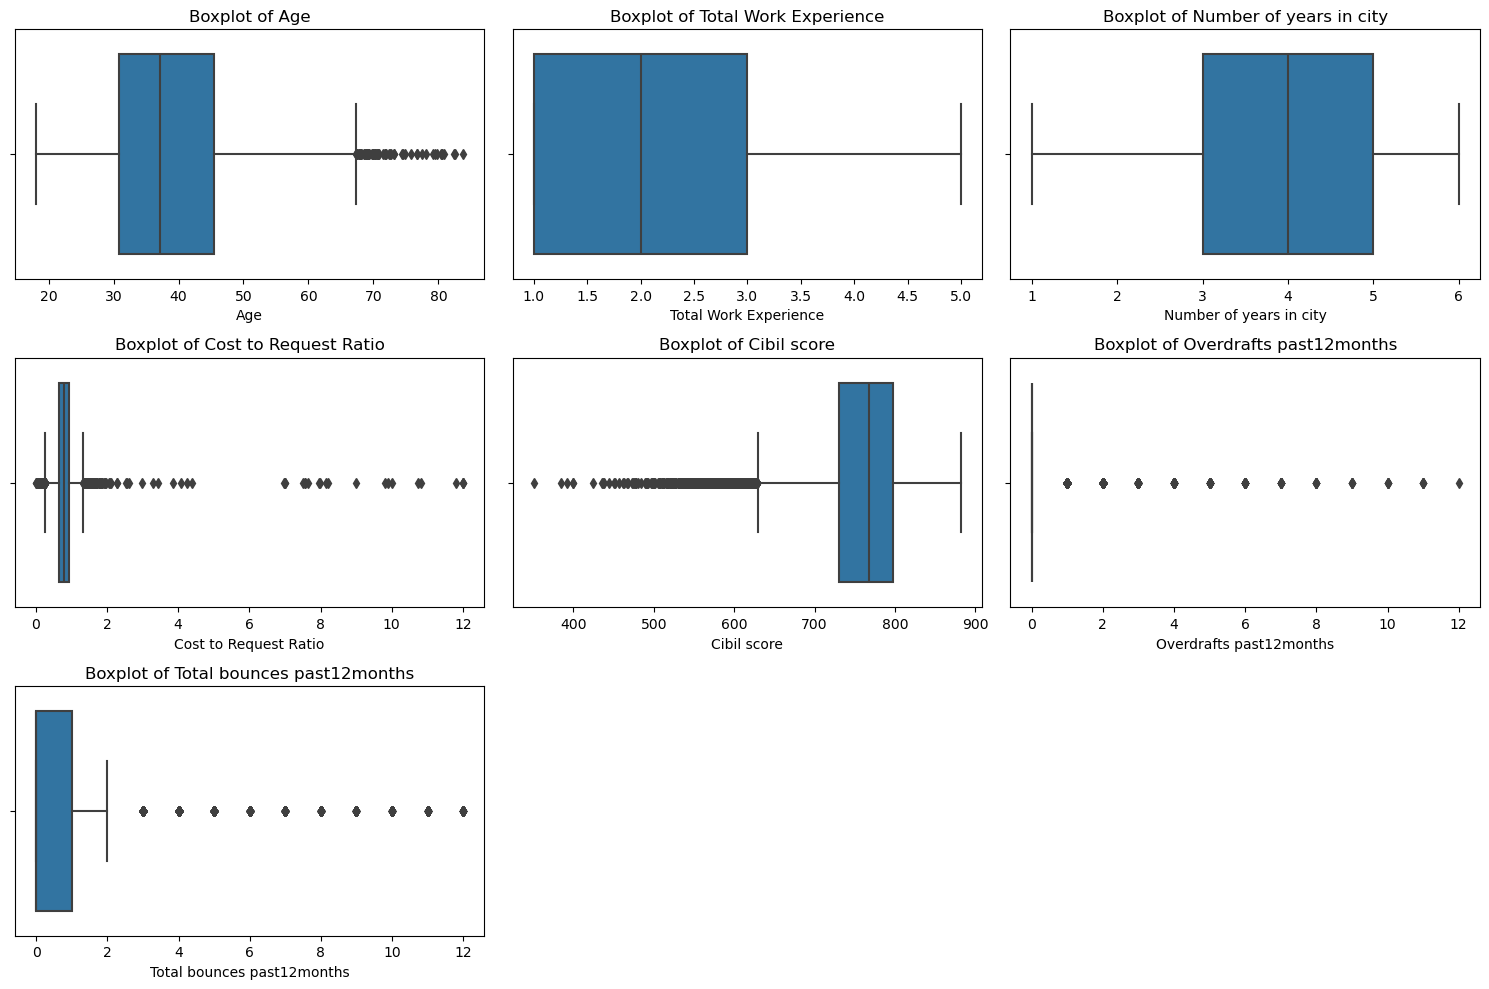

In [15]:

n_cols = 3
n_rows = int(np.ceil(len(num_col.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Loop through each numeric column and plot the boxplot
for i, col in enumerate(num_col.columns):
    sns.boxplot(data=num_col, x=col, ax=axes[i])  # Pass the column name for plotting
    axes[i].set_title(f"Boxplot of {col}")

# Remove any unused subplot spaces
for j in range(len(num_col.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [11]:
num_col.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [94]:
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [95]:
data.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [96]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8990    False
8991    False
8992    False
8993    False
8994    False
Length: 8995, dtype: bool

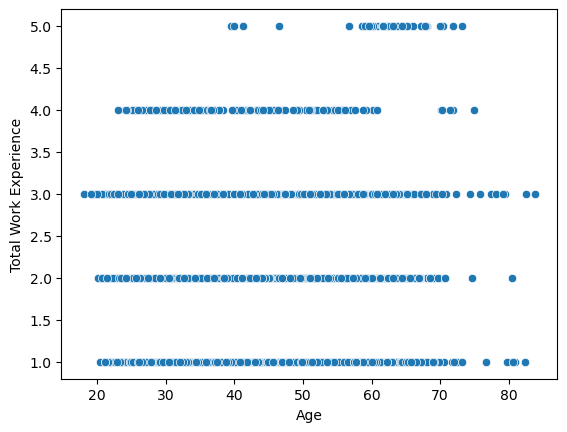

In [97]:
sns.scatterplot(x="Age",y="Total Work Experience",data=data);

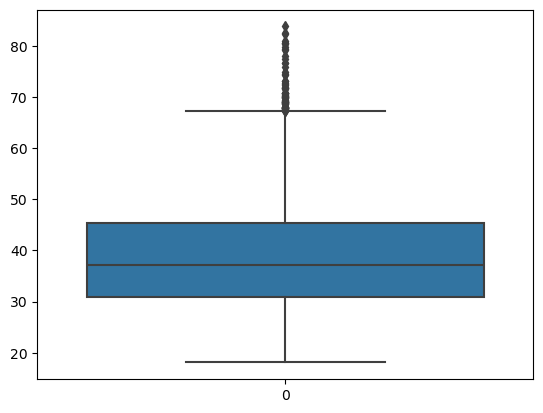

In [98]:
sns.boxplot(data["Age"]);

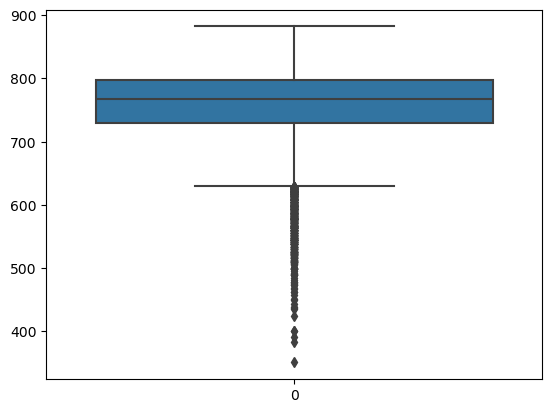

In [99]:
sns.boxplot(data["Cibil score"]);

In [100]:
data.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [101]:
x=data.drop("Total bounces past12months",axis=1)
y=data["Total bounces past12months"]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [104]:
x_train.shape

(7196, 6)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [107]:
model.score(x_train,y_train)

0.6787103946637021

In [108]:
model.score(x_test,y_test)

0.6470261256253474

In [109]:
y_pred=model.predict(x_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
result={
    "K_value":[],
    "Train_Accuracy":[],
    "Test_Accuracy":[]
}

In [112]:

for i in range(1,15):
    model=KNeighborsClassifier(n_neighbors=i)
    
    model.fit(x_train,y_train)
    result["K_value"].append(i)
    train_acc=model.score(x_train,y_train)
    result["Train_Accuracy"].append(train_acc)
    test_acc=model.score(x_test,y_test)
    result["Test_Accuracy"].append(test_acc)


In [113]:
result=pd.DataFrame(result)
result

,K_value,Train_Accuracy,Test_Accuracy
0,1,1.000000,0.546415
1,2,0.740828,0.625903
2,3,0.706643,0.627015
3,4,0.686215,0.637021
4,5,0.678710,0.647026
5,6,0.668149,0.653141
6,7,0.662868,0.649805
7,8,0.660784,0.654252
8,9,0.657449,0.655920
9,10,0.656059,0.659255


C:\Users\JAYANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAYANT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

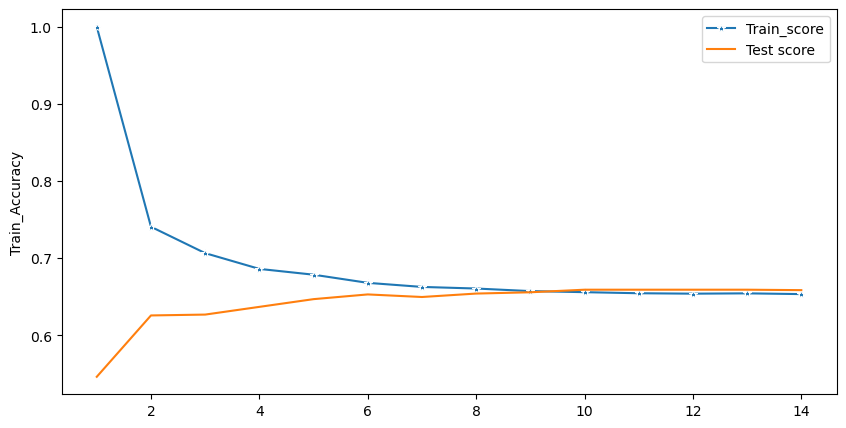

In [114]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,15),y=result["Train_Accuracy"],marker="*",label="Train_score")
sns.lineplot(x=range(1,15),y=result["Test_Accuracy"],markers="^",label="Test score")
plt.show()             

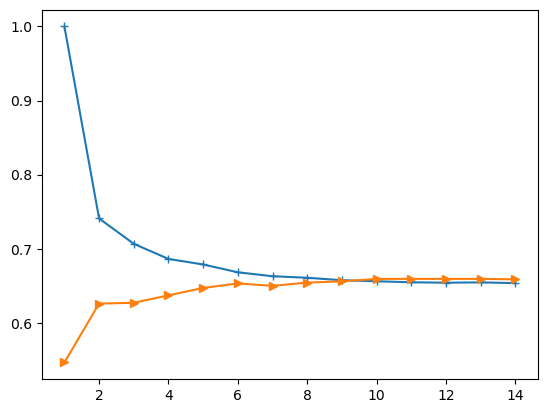

In [117]:
plt.plot(range(1,15),result["Train_Accuracy"],marker="+")
plt.plot(range(1,15),result["Test_Accuracy"],marker=">");

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xb
import catboost as cb

In [71]:
lis=[DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB,SVC,xb.XGBClassifier,cb.CatBoostClassifier]

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score

In [74]:
result={"Model_name":[],"Train_accuracy":[],"Test_accuracy":[],"Precision":[],"Recall":[],"F1":[]}
for model_class in lis:
    model=model_class()
    name=model_class.__name__
    print(f"Model Name:---->{name}")
    result["Model_name"].append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    
    train_acc=model.score(x_train,y_train)
    result["Train_accuracy"].append(train_acc)
    print(f"Train Accuracy:--->{train_acc}")
    
    
    
    test_acc=model.score(x_test,y_test)
    result["Test_accuracy"].append(test_acc)
    print(f"Test Accuracy:---> {test_acc}")
    
    
    recall=recall_score(y_test,y_pred,average="weighted")
    result["Recall"].append(recall)
    print(f"Recall score:---->{recall}")
    
    
    precison=precision_score(y_test,y_pred,average="weighted")
    result["Precision"].append(precison)
    print(f"Precision score:--->{precison}")
    
    f1=f1_score(y_test,y_pred,average="weighted")
    result["F1"].append(f1)
    print(f"F1 score:--->{f1}")
    
    print("\n\n")
    
    
result=pd.DataFrame(result) 
result

Model Name:---->DecisionTreeClassifier
Train Accuracy:--->1.0
Test Accuracy:---> 0.5692051139521956
Recall score:---->0.5692051139521956
Precision score:--->0.59526969575727
F1 score:--->0.581336856801426
Model Name:---->RandomForestClassifier
Train Accuracy:--->1.0
Test Accuracy:---> 0.7031684269038355
Recall score:---->0.7031684269038355
Precision score:--->0.6281480209578086
F1 score:--->0.6571194451191454
Model Name:---->GradientBoostingClassifier
Train Accuracy:--->0.7790439132851584
Test Accuracy:---> 0.7020566981656475
Recall score:---->0.7020566981656475
Precision score:--->0.6187628958970859
F1 score:--->0.6489087947467942
Model Name:---->KNeighborsClassifier
Train Accuracy:--->0.6787103946637021
Test Accuracy:---> 0.6470261256253474
Recall score:---->0.6470261256253474
Precision score:--->0.5075980781620071
F1 score:--->0.5486893137298813
Model Name:---->GaussianNB
Train Accuracy:--->0.6956642579210672
Test Accuracy:---> 0.7042801556420234
Recall score:---->0.7042801556420234

C:\Users\JAYANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JAYANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy:--->0.6493885491939967
Test Accuracy:---> 0.6675931072818232
Recall score:---->0.6675931072818232
Precision score:--->0.4456805568901999
F1 score:--->0.5345195478969798
Model Name:---->XGBClassifier


C:\Users\JAYANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy:--->0.9134241245136187
Test Accuracy:---> 0.69816564758199
Recall score:---->0.69816564758199
Precision score:--->0.6190134018939681
F1 score:--->0.6519870615859118
Model Name:---->CatBoostClassifier
Learning rate set to 0.087505
0:	learn: 2.0920739	total: 79.2ms	remaining: 1m 19s
1:	learn: 1.8654397	total: 113ms	remaining: 56.3s
2:	learn: 1.7160279	total: 168ms	remaining: 55.9s
3:	learn: 1.6116181	total: 228ms	remaining: 56.7s
4:	learn: 1.5234135	total: 279ms	remaining: 55.4s
5:	learn: 1.4567808	total: 338ms	remaining: 55.9s
6:	learn: 1.4010858	total: 393ms	remaining: 55.7s
7:	learn: 1.3529249	total: 439ms	remaining: 54.4s
8:	learn: 1.3134462	total: 485ms	remaining: 53.4s
9:	learn: 1.2772530	total: 506ms	remaining: 50.1s
10:	learn: 1.2476195	total: 551ms	remaining: 49.5s
11:	learn: 1.2211064	total: 604ms	remaining: 49.7s
12:	learn: 1.1970567	total: 653ms	remaining: 49.6s
13:	learn: 1.1754116	total: 700ms	remaining: 49.3s
14:	learn: 1.1565225	total: 750ms	remaining: 49.2

158:	learn: 0.8622597	total: 9.41s	remaining: 49.8s
159:	learn: 0.8613014	total: 9.5s	remaining: 49.9s
160:	learn: 0.8609420	total: 9.6s	remaining: 50s
161:	learn: 0.8603416	total: 9.69s	remaining: 50.1s
162:	learn: 0.8595781	total: 9.75s	remaining: 50.1s
163:	learn: 0.8588109	total: 9.81s	remaining: 50s
164:	learn: 0.8582610	total: 9.91s	remaining: 50.2s
165:	learn: 0.8574998	total: 10s	remaining: 50.4s
166:	learn: 0.8565425	total: 10.1s	remaining: 50.4s
167:	learn: 0.8559696	total: 10.2s	remaining: 50.4s
168:	learn: 0.8552746	total: 10.2s	remaining: 50.3s
169:	learn: 0.8544787	total: 10.3s	remaining: 50.3s
170:	learn: 0.8540022	total: 10.4s	remaining: 50.4s
171:	learn: 0.8534456	total: 10.5s	remaining: 50.5s
172:	learn: 0.8528155	total: 10.5s	remaining: 50.3s
173:	learn: 0.8522995	total: 10.6s	remaining: 50.3s
174:	learn: 0.8516579	total: 10.7s	remaining: 50.3s
175:	learn: 0.8512418	total: 10.7s	remaining: 50.3s
176:	learn: 0.8506805	total: 10.8s	remaining: 50.3s
177:	learn: 0.850175

318:	learn: 0.7578263	total: 19.8s	remaining: 42.4s
319:	learn: 0.7573976	total: 19.9s	remaining: 42.3s
320:	learn: 0.7568949	total: 19.9s	remaining: 42.2s
321:	learn: 0.7562591	total: 20s	remaining: 42.1s
322:	learn: 0.7557898	total: 20s	remaining: 42s
323:	learn: 0.7550859	total: 20.1s	remaining: 41.9s
324:	learn: 0.7547690	total: 20.1s	remaining: 41.8s
325:	learn: 0.7542758	total: 20.2s	remaining: 41.7s
326:	learn: 0.7536348	total: 20.2s	remaining: 41.6s
327:	learn: 0.7532839	total: 20.3s	remaining: 41.5s
328:	learn: 0.7527559	total: 20.3s	remaining: 41.5s
329:	learn: 0.7524586	total: 20.4s	remaining: 41.4s
330:	learn: 0.7516450	total: 20.5s	remaining: 41.4s
331:	learn: 0.7506587	total: 20.5s	remaining: 41.3s
332:	learn: 0.7502842	total: 20.6s	remaining: 41.2s
333:	learn: 0.7500445	total: 20.6s	remaining: 41.1s
334:	learn: 0.7497091	total: 20.7s	remaining: 41s
335:	learn: 0.7495331	total: 20.7s	remaining: 41s
336:	learn: 0.7489819	total: 20.8s	remaining: 40.9s
337:	learn: 0.7486996	

477:	learn: 0.6821441	total: 28.3s	remaining: 30.9s
478:	learn: 0.6817662	total: 28.4s	remaining: 30.8s
479:	learn: 0.6812862	total: 28.4s	remaining: 30.8s
480:	learn: 0.6805718	total: 28.5s	remaining: 30.7s
481:	learn: 0.6801941	total: 28.5s	remaining: 30.6s
482:	learn: 0.6796599	total: 28.6s	remaining: 30.6s
483:	learn: 0.6793219	total: 28.6s	remaining: 30.5s
484:	learn: 0.6787925	total: 28.7s	remaining: 30.4s
485:	learn: 0.6784032	total: 28.7s	remaining: 30.4s
486:	learn: 0.6780306	total: 28.8s	remaining: 30.4s
487:	learn: 0.6776313	total: 28.9s	remaining: 30.3s
488:	learn: 0.6767059	total: 29s	remaining: 30.3s
489:	learn: 0.6761034	total: 29s	remaining: 30.2s
490:	learn: 0.6756456	total: 29.1s	remaining: 30.2s
491:	learn: 0.6753571	total: 29.2s	remaining: 30.2s
492:	learn: 0.6747939	total: 29.3s	remaining: 30.1s
493:	learn: 0.6744102	total: 29.3s	remaining: 30.1s
494:	learn: 0.6740731	total: 29.4s	remaining: 30s
495:	learn: 0.6735869	total: 29.4s	remaining: 29.9s
496:	learn: 0.6733

640:	learn: 0.6151897	total: 36.8s	remaining: 20.6s
641:	learn: 0.6147941	total: 36.9s	remaining: 20.6s
642:	learn: 0.6143579	total: 36.9s	remaining: 20.5s
643:	learn: 0.6140538	total: 36.9s	remaining: 20.4s
644:	learn: 0.6137346	total: 37s	remaining: 20.4s
645:	learn: 0.6133690	total: 37s	remaining: 20.3s
646:	learn: 0.6129393	total: 37.1s	remaining: 20.2s
647:	learn: 0.6123210	total: 37.1s	remaining: 20.2s
648:	learn: 0.6117877	total: 37.2s	remaining: 20.1s
649:	learn: 0.6112741	total: 37.2s	remaining: 20s
650:	learn: 0.6110832	total: 37.3s	remaining: 20s
651:	learn: 0.6107112	total: 37.3s	remaining: 19.9s
652:	learn: 0.6103712	total: 37.3s	remaining: 19.8s
653:	learn: 0.6099883	total: 37.4s	remaining: 19.8s
654:	learn: 0.6097217	total: 37.4s	remaining: 19.7s
655:	learn: 0.6092733	total: 37.5s	remaining: 19.7s
656:	learn: 0.6088851	total: 37.5s	remaining: 19.6s
657:	learn: 0.6084713	total: 37.6s	remaining: 19.5s
658:	learn: 0.6078466	total: 37.6s	remaining: 19.5s
659:	learn: 0.607360

801:	learn: 0.5584388	total: 46.3s	remaining: 11.4s
802:	learn: 0.5582651	total: 46.4s	remaining: 11.4s
803:	learn: 0.5581342	total: 46.5s	remaining: 11.3s
804:	learn: 0.5576580	total: 46.5s	remaining: 11.3s
805:	learn: 0.5574005	total: 46.6s	remaining: 11.2s
806:	learn: 0.5572547	total: 46.6s	remaining: 11.1s
807:	learn: 0.5571056	total: 46.7s	remaining: 11.1s
808:	learn: 0.5568886	total: 46.7s	remaining: 11s
809:	learn: 0.5565196	total: 46.7s	remaining: 11s
810:	learn: 0.5561520	total: 46.8s	remaining: 10.9s
811:	learn: 0.5559161	total: 46.9s	remaining: 10.8s
812:	learn: 0.5554716	total: 46.9s	remaining: 10.8s
813:	learn: 0.5550651	total: 47s	remaining: 10.7s
814:	learn: 0.5548096	total: 47s	remaining: 10.7s
815:	learn: 0.5544020	total: 47.1s	remaining: 10.6s
816:	learn: 0.5537982	total: 47.1s	remaining: 10.6s
817:	learn: 0.5533579	total: 47.2s	remaining: 10.5s
818:	learn: 0.5529729	total: 47.3s	remaining: 10.4s
819:	learn: 0.5527424	total: 47.3s	remaining: 10.4s
820:	learn: 0.552378

962:	learn: 0.5071692	total: 54.4s	remaining: 2.09s
963:	learn: 0.5070089	total: 54.4s	remaining: 2.03s
964:	learn: 0.5067508	total: 54.5s	remaining: 1.98s
965:	learn: 0.5062807	total: 54.5s	remaining: 1.92s
966:	learn: 0.5061304	total: 54.6s	remaining: 1.86s
967:	learn: 0.5057485	total: 54.6s	remaining: 1.8s
968:	learn: 0.5054936	total: 54.7s	remaining: 1.75s
969:	learn: 0.5053407	total: 54.7s	remaining: 1.69s
970:	learn: 0.5051043	total: 54.8s	remaining: 1.64s
971:	learn: 0.5047797	total: 54.8s	remaining: 1.58s
972:	learn: 0.5045509	total: 54.8s	remaining: 1.52s
973:	learn: 0.5042631	total: 54.9s	remaining: 1.47s
974:	learn: 0.5041120	total: 54.9s	remaining: 1.41s
975:	learn: 0.5037787	total: 55s	remaining: 1.35s
976:	learn: 0.5033684	total: 55s	remaining: 1.29s
977:	learn: 0.5031182	total: 55.1s	remaining: 1.24s
978:	learn: 0.5028414	total: 55.1s	remaining: 1.18s
979:	learn: 0.5025960	total: 55.2s	remaining: 1.13s
980:	learn: 0.5023732	total: 55.2s	remaining: 1.07s
981:	learn: 0.501

,Model_name,Train_accuracy,Test_accuracy,Precision,Recall,F1
0,DecisionTreeClassifier,1.000000,0.569205,0.595270,0.569205,0.581337
1,RandomForestClassifier,1.000000,0.703168,0.628148,0.703168,0.657119
2,GradientBoostingClassifier,0.779044,0.702057,0.618763,0.702057,0.648909
3,KNeighborsClassifier,0.678710,0.647026,0.507598,0.647026,0.548689
4,GaussianNB,0.695664,0.704280,0.601541,0.704280,0.644012
5,SVC,0.649389,0.667593,0.445681,0.667593,0.534520
6,XGBClassifier,0.913424,0.698166,0.619013,0.698166,0.651987
7,CatBoostClassifier,0.846442,0.703168,0.622746,0.703168,0.655587


In [76]:
y_train.value_counts()

Total bounces past12months
0     4673
1     1001
2      430
3      268
4      175
5      139
7      104
6      101
8       84
9       65
10      62
11      60
12      34
Name: count, dtype: int64

In [79]:
from sklearn.model_selection import KFold,cross_val_score,RandomizedSearchCV,train_test_split

In [78]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

In [83]:
model=RandomForestClassifier(random_state=42)
param={ "n_estimators":[100,200,300],
    
    "criterion":['gini',"entropy"],
    "max_depth":[2,3,4,5],
    "min_samples_split":[2,3,4,5],
   
    "max_features":[0.5,0.75,1.0],
    
    }
ran=RandomizedSearchCV(model,cv=kf,param_distributions=param,n_jobs=-1,scoring="accuracy")
ran.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': [0.5, 0.75, 1.0],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [85]:
best_param=ran.best_params_

In [87]:
model=RandomForestClassifier(**best_param,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(f"Train Accuracy:--->{model.score(x_train,y_train)}")
print(f"Test Accuracy:---->{model.score(x_test,y_test)}")
print(f"Recal score:--->{recall_score(y_test,y_pred,average='weighted')}")
print(f"Precision score:--->{precision_score(y_test,y_pred,average='weighted')}")
print(f"F1 score:--->{f1_score(y_test,y_pred,average='weighted')}")

Train Accuracy:--->0.7040022234574764
Test Accuracy:---->0.7092829349638688
Recal score:--->0.7092829349638688
Precision score:--->0.5896097831964491
F1 score:--->0.6438238487732626


C:\Users\JAYANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
